In [188]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

**READING THE DATASET**

In [189]:
df = pd.read_csv('Pizza.csv')

In [190]:
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


**Implementing KNN algorithm with Neighbours = 7**

In [191]:
X = df.drop('brand', axis=1)
y = df['brand']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)


In [193]:
X_std = StandardScaler().fit_transform(X)

In [194]:
model = KNeighborsClassifier(n_neighbors=7)

In [195]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [196]:
y_pred = model.predict(X_test)

In [197]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [198]:
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         6
           B       1.00      1.00      1.00         5
           C       1.00      0.86      0.92         7
           D       0.89      1.00      0.94         8
           E       0.17      1.00      0.29         2
           F       1.00      0.83      0.91         6
           G       0.83      1.00      0.91         5
           H       1.00      0.09      0.17        11
           I       1.00      1.00      1.00         4
           J       1.00      1.00      1.00         6

    accuracy                           0.80        60
   macro avg       0.89      0.88      0.81        60
weighted avg       0.94      0.80      0.79        60



**APPLYING PCA AND SVD**


*Applying PCA*

In [199]:
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_std)

*Applying SVD*

In [200]:
svd = TruncatedSVD(n_components=X.shape[1])
X_svd = svd.fit_transform(X_std)

In [201]:
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
X_svd_df = pd.DataFrame(X_svd, columns=[f'SVD{i}' for i in range(1, X.shape[1] + 1)])


**Implementing KNeighborsClassifier model after PCA**

In [202]:
model_after_pca = KNeighborsClassifier(n_neighbors=7)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)
model_after_pca.fit(X_train_pca, y_train)
y_pred_after_pca = model_after_pca.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_after_pca)

**Implementing KNeighborsClassifier model after SVD**

In [203]:
model_after_svd = KNeighborsClassifier(n_neighbors=7)
X_train_svd, X_test_svd, y_train, y_test = train_test_split(X_svd_df, y, test_size=0.2, random_state=42)
model_after_svd.fit(X_train_svd, y_train)
y_pred_after_svd = model_after_svd.predict(X_test_svd)
accuracy_after_svd = accuracy_score(y_test, y_pred_after_svd)

***RESULTS***

In [204]:
print(f'Mean Accuracy Score Before Dimensionality Reduction: {accuracy}')
print(f'Mean Accuracy Score After PCA: {accuracy_after_pca}')
print(f'Mean Accuracy Score After SVD: {accuracy_after_svd}')

Mean Accuracy Score Before Dimensionality Reduction: 0.8
Mean Accuracy Score After PCA: 0.8
Mean Accuracy Score After SVD: 0.8


In [205]:
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
print("\nPCA Components:")
print(pca_components_df)


PCA Components:
           id      mois      prot       fat       ash    sodium      carb  \
PC1 -0.019940  0.064479  0.378951  0.446467  0.471814  0.435551 -0.424756   
PC2 -0.005818 -0.628375 -0.269610  0.234215 -0.111065  0.201522  0.320417   
PC3  0.993250  0.048964 -0.082247  0.045232  0.000345  0.043374 -0.018992   
PC4  0.111332 -0.417773  0.740512 -0.193036  0.055718 -0.456741  0.049090   
PC5  0.020798 -0.222559 -0.008862 -0.506870  0.555431  0.441865  0.334420   
PC6  0.013981  0.004557  0.389774 -0.175580 -0.668468  0.603271 -0.006065   
PC7  0.000258  0.446454 -0.000070 -0.525428  0.058813  0.003213 -0.000432   
PC8 -0.000100  0.418546  0.276734  0.377732  0.056037 -0.000556  0.776061   

          cal  
PC1  0.244494  
PC2  0.567408  
PC3  0.002045  
PC4  0.115424  
PC5 -0.278306  
PC6 -0.078809  
PC7  0.721897  
PC8  0.012011  


In [206]:
svd_components_df = pd.DataFrame(svd.components_, columns=X.columns, index=[f'SVD{i}' for i in range(1, X.shape[1] + 1)])
print("\nSVD Components:")
print(svd_components_df)


SVD Components:
            id      mois      prot       fat       ash    sodium      carb  \
SVD1 -0.019940  0.064479  0.378951  0.446467  0.471814  0.435551 -0.424756   
SVD2 -0.005818 -0.628375 -0.269610  0.234215 -0.111065  0.201522  0.320417   
SVD3  0.993250  0.048964 -0.082247  0.045232  0.000345  0.043374 -0.018992   
SVD4  0.111332 -0.417773  0.740512 -0.193036  0.055718 -0.456741  0.049090   
SVD5  0.020798 -0.222559 -0.008862 -0.506870  0.555431  0.441865  0.334420   
SVD6  0.013981  0.004557  0.389774 -0.175580 -0.668468  0.603271 -0.006065   
SVD7  0.000258  0.446454 -0.000070 -0.525428  0.058813  0.003213 -0.000432   
SVD8 -0.000100  0.418546  0.276734  0.377732  0.056037 -0.000556  0.776061   

           cal  
SVD1  0.244494  
SVD2  0.567408  
SVD3  0.002045  
SVD4  0.115424  
SVD5 -0.278306  
SVD6 -0.078809  
SVD7  0.721897  
SVD8  0.012011  


***VISUALIZATIONS***

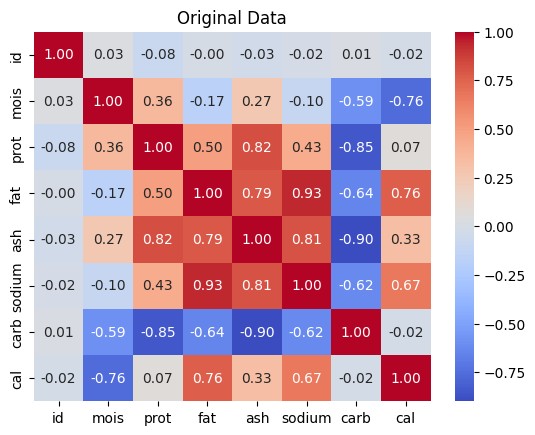

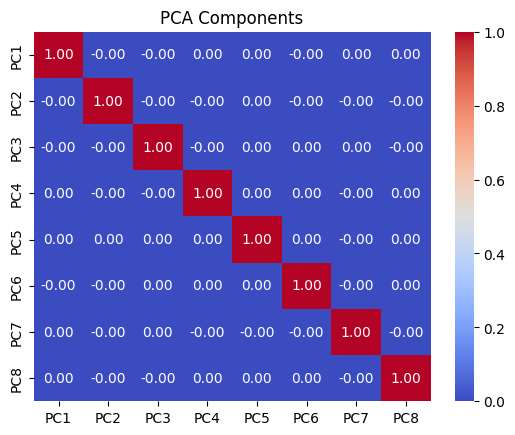

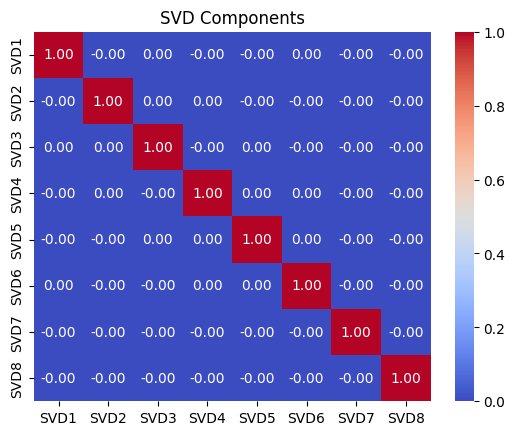

<Figure size 640x480 with 0 Axes>

In [207]:

sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Original Data')
plt.show()

sns.heatmap(X_pca_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PCA Components')
plt.show()
sns.heatmap(X_svd_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('SVD Components')
plt.show()
plt.tight_layout()
